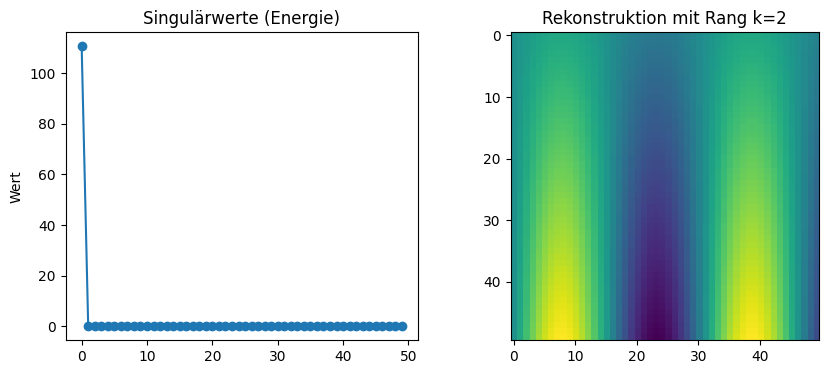

Originale Parameter: 2500
Komprimierte Parameter: 202
Kompression: 91.92%


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Erzeuge eine "strukturierte" Matrix (z.B. ein Bild oder Muster)
# Wir nehmen eine Matrix mit Rang-Defizit (viele Korrelationen)
A = np.outer(np.linspace(1, 5, 50), np.sin(np.linspace(0, 10, 50)))

# 2. SVD durchführen
U, S, Vt = np.linalg.svd(A)

# 3. Visualisierung der Singulärwerte (Energie-Verteilung)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(S, 'o-')
plt.title("Singulärwerte (Energie)")
plt.ylabel("Wert")

# 4. Kompression: Nutze nur die ersten k Singulärwerte
k = 2  # Probiere 1, 2, 5, 10
S_compressed = np.zeros((U.shape[1], Vt.shape[0]))
np.fill_diagonal(S_compressed, S)
S_compressed[k:, k:] = 0 # Alles nach Rang k abschneiden

A_reconstructed = U @ S_compressed @ Vt

plt.subplot(1, 2, 2)
plt.imshow(A_reconstructed)
plt.title(f"Rekonstruktion mit Rang k={k}")
plt.show()

# 5. Ersparnis berechnen
original_size = A.size
compressed_size = U[:, :k].size + k + Vt[:k, :].size
print(f"Originale Parameter: {original_size}")
print(f"Komprimierte Parameter: {compressed_size}")
print(f"Kompression: {100 * (1 - compressed_size/original_size):.2f}%")